In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [39]:
def rounder(t):
    if t.minute >= 30:
        return t.replace(second=0, microsecond=0, minute=0, hour=t.hour+1)
    else:
        return t.replace(second=0, microsecond=0, minute=0)

In [40]:
def regression_results(y_true, y_pred):
    
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

# Sorting the data

In [102]:
!pwd /content/Project2.xlsx
df = pd.read_excel(r'Project2.xlsx','power load')
df

/content


,Date (HourEnding),PJM MAAC load,Unnamed: 2,Unnamed: 3,Unnamed: 4,Date (HourBeginning),dryTemperature,dewPoint,Humidity,HumidityIndex,WindSpeed,WindChill
0,2000-01-01 01:00:00.288,3276.000,NaN,NaN,NaN,2000-01-01 00:00:00,35,34,96,35,0,35
1,2000-01-01 02:00:00.000,3217.000,NaN,NaN,NaN,2000-01-01 01:00:00,37,36,96,37,3,37
2,2000-01-01 03:00:00.000,3140.000,NaN,NaN,NaN,2000-01-01 02:00:00,37,37,100,37,3,37
3,2000-01-01 04:00:00.288,3103.000,NaN,NaN,NaN,2000-01-01 03:00:00,35,34,96,35,3,35
4,2000-01-01 04:59:59.712,3105.000,NaN,NaN,NaN,2000-01-01 04:00:00,33,33,100,33,3,33
...,...,...,...,...,...,...,...,...,...,...,...,...
163069,2018-08-08 15:00:00.000,5700.040,NaN,NaN,NaN,2018-08-09 20:00:00,86,64,48,87,10,86
163070,2018-08-08 16:00:00.288,5826.906,NaN,NaN,NaN,2018-08-09 21:00:00,84,65,53,86,8,84
163071,2018-08-08 16:59:59.712,6043.440,NaN,NaN,NaN,2018-08-09 22:00:00,83,65,55,85,7,83
163072,2018-08-08 18:00:00.000,6147.912,NaN,NaN,NaN,2018-08-09 23:00:00,81,66,60,83,7,81


In [103]:
dfload=df.loc[:,['Date (HourEnding)','PJM MAAC load']]

date=[]
hour=[]
date_hour=[]
for i in range(len(dfload)):
    date.append(dfload['Date (HourEnding)'][i].strftime('%Y-%m-%d'))
    hour.append(rounder(dfload['Date (HourEnding)'][i]).strftime('%H'))
    date_hour.append(rounder(dfload['Date (HourEnding)'][i]).strftime('%Y-%m-%d %H'))
dfload['Date']=date
dfload['Hour']=hour
dfload['Date&Hour']=date_hour

dfload=dfload[['Date&Hour','Date','Hour','PJM MAAC load']]
dfload

,Date&Hour,Date,Hour,PJM MAAC load
0,2000-01-01 01,2000-01-01,01,3276.000
1,2000-01-01 02,2000-01-01,02,3217.000
2,2000-01-01 03,2000-01-01,03,3140.000
3,2000-01-01 04,2000-01-01,04,3103.000
4,2000-01-01 05,2000-01-01,05,3105.000
...,...,...,...,...
163069,2018-08-08 15,2018-08-08,15,5700.040
163070,2018-08-08 16,2018-08-08,16,5826.906
163071,2018-08-08 17,2018-08-08,17,6043.440
163072,2018-08-08 18,2018-08-08,18,6147.912


In [104]:
dfload.loc[dfload['Date'] == '2000-10-29']

,Date&Hour,Date,Hour,PJM MAAC load
7246,2000-10-29 00,2000-10-29,00,2802.0
7247,2000-10-29 01,2000-10-29,01,2633.0
7248,2000-10-29 01,2000-10-29,01,2501.0
7249,2000-10-29 02,2000-10-29,02,2481.0
7250,2000-10-29 03,2000-10-29,03,2461.0
7251,2000-10-29 04,2000-10-29,04,2465.0
7252,2000-10-29 05,2000-10-29,05,2533.0
7253,2000-10-29 06,2000-10-29,06,2611.0
7254,2000-10-29 07,2000-10-29,07,2735.0
7255,2000-10-29 08,2000-10-29,08,2957.0


In [105]:
duplicate=[]
duplicate_count=0
for i in range(1,len(dfload)):
    if dfload['Date'][i]==dfload['Date'][i-1]:
        if dfload['Hour'][i]==dfload['Hour'][i-1]:
            duplicate.append(i)
            duplicate_count+=1
print(duplicate_count)

order=0
for i in range(len(duplicate)):
    delete_duplicate=duplicate[i]
    dfload=dfload.drop(delete_duplicate)
dfload=dfload.reset_index(drop=True)

18


In [106]:
len(dfload)==len(df)-duplicate_count

True

In [108]:
dfload.loc[dfload['Date'] == dfload.iloc[duplicate[0]].Date]

,Date&Hour,Date,Hour,PJM MAAC load
7246,2000-10-29 00,2000-10-29,00,2802.0
7247,2000-10-29 01,2000-10-29,01,2633.0
7248,2000-10-29 02,2000-10-29,02,2481.0
7249,2000-10-29 03,2000-10-29,03,2461.0
7250,2000-10-29 04,2000-10-29,04,2465.0
7251,2000-10-29 05,2000-10-29,05,2533.0
7252,2000-10-29 06,2000-10-29,06,2611.0
7253,2000-10-29 07,2000-10-29,07,2735.0
7254,2000-10-29 08,2000-10-29,08,2957.0
7255,2000-10-29 09,2000-10-29,09,3127.0


### ========================================================================================

In [51]:
dftemp=df.loc[:,['Date (HourBeginning)','dryTemperature','dewPoint','Humidity','HumidityIndex','WindSpeed','WindChill']]
dftemp

,Date (HourBeginning),dryTemperature,dewPoint,Humidity,HumidityIndex,WindSpeed,WindChill
0,2000-01-01 00:00:00,35,34,96,35,0,35
1,2000-01-01 01:00:00,37,36,96,37,3,37
2,2000-01-01 02:00:00,37,37,100,37,3,37
3,2000-01-01 03:00:00,35,34,96,35,3,35
4,2000-01-01 04:00:00,33,33,100,33,3,33
...,...,...,...,...,...,...,...
163069,2018-08-09 20:00:00,86,64,48,87,10,86
163070,2018-08-09 21:00:00,84,65,53,86,8,84
163071,2018-08-09 22:00:00,83,65,55,85,7,83
163072,2018-08-09 23:00:00,81,66,60,83,7,81


In [54]:
from datetime import datetime, timedelta
dftemp['Date (HourBeginning)'] = dftemp['Date (HourBeginning)'] + pd.Timedelta(hours=1)
dftemp

,Date (HourBeginning),dryTemperature,dewPoint,Humidity,HumidityIndex,WindSpeed,WindChill,Date
0,2000-01-01 01:00:00,35,34,96,35,0,35,2000-01-01
1,2000-01-01 02:00:00,37,36,96,37,3,37,2000-01-01
2,2000-01-01 03:00:00,37,37,100,37,3,37,2000-01-01
3,2000-01-01 04:00:00,35,34,96,35,3,35,2000-01-01
4,2000-01-01 05:00:00,33,33,100,33,3,33,2000-01-01
...,...,...,...,...,...,...,...,...
163069,2018-08-09 21:00:00,86,64,48,87,10,86,2018-08-09
163070,2018-08-09 22:00:00,84,65,53,86,8,84,2018-08-09
163071,2018-08-09 23:00:00,83,65,55,85,7,83,2018-08-09
163072,2018-08-10 00:00:00,81,66,60,83,7,81,2018-08-09


In [55]:
date=[]
hour=[]
date_hour=[]
for i in range(len(dftemp)):
    date.append(dftemp['Date (HourBeginning)'][i].strftime('%Y-%m-%d'))
    hour.append(rounder(dftemp['Date (HourBeginning)'][i]).strftime('%H'))
    date_hour.append(rounder(dftemp['Date (HourBeginning)'][i]).strftime('%Y-%m-%d %H'))
dftemp['Date']=date
dftemp['Hour']=hour
dftemp['Date&Hour']=date_hour

dftemp=dftemp[['Date&Hour','Date','Hour','dryTemperature','dewPoint','Humidity','HumidityIndex','WindSpeed','WindChill']]
dftemp

,Date&Hour,Date,Hour,dryTemperature,dewPoint,Humidity,HumidityIndex,WindSpeed,WindChill
0,2000-01-01 01,2000-01-01,01,35,34,96,35,0,35
1,2000-01-01 02,2000-01-01,02,37,36,96,37,3,37
2,2000-01-01 03,2000-01-01,03,37,37,100,37,3,37
3,2000-01-01 04,2000-01-01,04,35,34,96,35,3,35
4,2000-01-01 05,2000-01-01,05,33,33,100,33,3,33
...,...,...,...,...,...,...,...,...,...
163069,2018-08-09 21,2018-08-09,21,86,64,48,87,10,86
163070,2018-08-09 22,2018-08-09,22,84,65,53,86,8,84
163071,2018-08-09 23,2018-08-09,23,83,65,55,85,7,83
163072,2018-08-10 00,2018-08-10,00,81,66,60,83,7,81


In [56]:
duplicate=[]
duplicate_count=0
for i in range(1,len(dftemp)):
    if dftemp['Date'][i]==dftemp['Date'][i-1]:
        if dftemp['Hour'][i]==dftemp['Hour'][i-1]:
            duplicate.append(i)
            duplicate_count+=1
print(duplicate_count)

order=0
for i in range(len(duplicate)):
    delete_duplicate=duplicate[i]
    dftemp=dftemp.drop(delete_duplicate)
dftemp=dftemp.reset_index(drop=True)

0


In [57]:
len(dfload),len(dftemp)

(163056, 163074)

In [58]:
dfload.loc[dfload['Date'] == '2000-12-31'].Hour,dftemp.loc[dftemp['Date'] == '2000-12-31'].Hour

(8758    00
 8759    01
 8760    02
 8761    03
 8762    04
 8763    05
 8764    06
 8765    07
 8766    08
 8767    09
 8768    10
 8769    11
 8770    12
 8771    13
 8772    14
 8773    15
 8774    16
 8775    17
 8776    18
 8777    19
 8778    20
 8779    21
 8780    22
 8781    23
 Name: Hour, dtype: object, 8758    00
 8759    01
 8760    02
 8761    03
 8762    04
 8763    05
 8764    06
 8765    07
 8766    08
 8767    09
 8768    10
 8769    11
 8770    12
 8771    13
 8772    14
 8773    15
 8774    16
 8775    17
 8776    18
 8777    19
 8778    20
 8779    21
 Name: Hour, dtype: object)

In [80]:
dffinal=pd.merge(dfload, dftemp,on='Date&Hour')
dffinal.head()

,Date&Hour,Date_x,Hour_x,PJM MAAC load,Date_y,Hour_y,dryTemperature,dewPoint,Humidity,HumidityIndex,WindSpeed,WindChill
0,2000-01-01 01,2000-01-01,01,3276.0,2000-01-01,01,35,34,96,35,0,35
1,2000-01-01 02,2000-01-01,02,3217.0,2000-01-01,02,37,36,96,37,3,37
2,2000-01-01 03,2000-01-01,03,3140.0,2000-01-01,03,37,37,100,37,3,37
3,2000-01-01 04,2000-01-01,04,3103.0,2000-01-01,04,35,34,96,35,3,35
4,2000-01-01 05,2000-01-01,05,3105.0,2000-01-01,05,33,33,100,33,3,33


In [29]:
#dffinal.to_csv('dffinal.csv')

# Linear model (Bad fit) score ~ 0.4

In [110]:
x=dffinal[['dryTemperature','dewPoint','Humidity','HumidityIndex','WindSpeed','WindChill']]
y=dffinal['PJM MAAC load']
x.head(),y.head()

(   dryTemperature  dewPoint  Humidity  HumidityIndex  WindSpeed  WindChill
 0              35        34        96             35          0         35
 1              37        36        96             37          3         37
 2              37        37       100             37          3         37
 3              35        34        96             35          3         35
 4              33        33       100             33          3         33,
 0    3276.0
 1    3217.0
 2    3140.0
 3    3103.0
 4    3105.0
 Name: PJM MAAC load, dtype: float64)

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 
lm = LinearRegression() 
lm.fit(x_train, y_train) 
y_pred = lm.predict(x_test)

In [112]:
TrueVSPred= {'TrueLoad':y_test, 'PredLoad':y_pred}
dftvp = pd.DataFrame(TrueVSPred)
dftvp=dftvp.reset_index(drop=True)
dftvp

,TrueLoad,PredLoad
0,4994.405,4210.238726
1,4619.927,4234.239973
2,4037.941,3341.595432
3,3356.861,3269.328034
4,3303.433,3080.394554
...,...,...
32600,4212.000,2897.472559
32601,3879.867,3653.434772
32602,3308.000,3983.649919
32603,3460.224,3654.592751


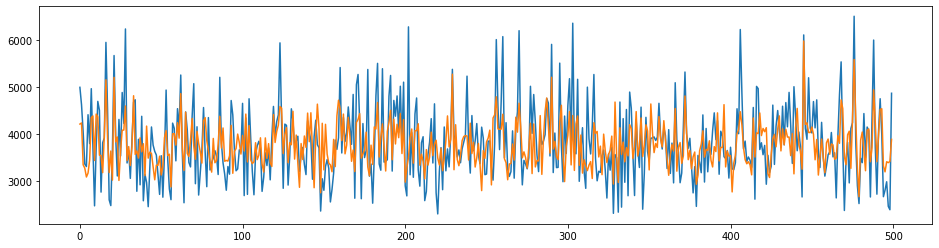

In [113]:
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(dftvp['TrueLoad'][:500])
ax.plot(dftvp['PredLoad'][:500])

In [114]:
print(regression_results(y_test,y_pred))
print('score{}'.format(lm.score(y_test,y_pred)))

explained_variance:  0.4047
mean_squared_log_error:  0.0274
r2:  0.4047
MAE:  497.9683
MSE:  385166.494
RMSE:  620.6178
None


ValueError: ignored

# NonLinear Model with all parameters 0.65195

In [65]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [76]:
degree_min=2
degree_max=4

lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
for degree in range(degree_min,degree_max+1):
    nlm = make_pipeline(PolynomialFeatures(degree, interaction_only=False),LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,
                                                                                           normalize=True,cv=5))
    nlm.fit(x_train,y_train)
    ynlm_pred = np.array(nlm.predict(x_test))
    print('degree of {}'.format(degree))
    print(regression_results(y_test,ynlm_pred))
    print('score{}\n'.format(nlm.score(x_train, y_train)))

degree of 2
explained_variance:  0.6537
mean_squared_log_error:  0.0168
r2:  0.6537
MAE:  385.6781
MSE:  224424.6987
RMSE:  473.7348
None
score0.653722248682278

degree of 3
explained_variance:  0.6657
mean_squared_log_error:  0.0162
r2:  0.6657
MAE:  379.7913
MSE:  216636.2746
RMSE:  465.442
None
score0.6674888237798451

degree of 4
explained_variance:  0.6673
mean_squared_log_error:  0.0162
r2:  0.6673
MAE:  378.6299
MSE:  215629.0633
RMSE:  464.3588
None
score0.6689827348047802



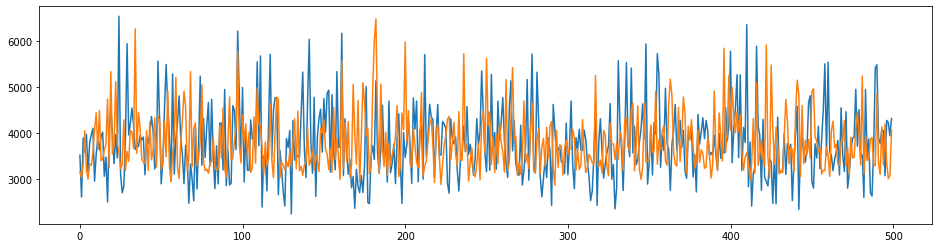

In [109]:
TrueVSPred= {'TrueLoad':y_test, 'PredLoad':ynlm_pred}
dftvp = pd.DataFrame(TrueVSPred)
dftvp=dftvp.reset_index(drop=True)
dftvp
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(dftvp['TrueLoad'][:500])
ax.plot(dftvp['PredLoad'][:500])

In [72]:
degree of 2
explained_variance:  0.6452
mean_squared_log_error:  0.0172
r2:  0.6452
MAE:  390.6482
MSE:  229684.2781
RMSE:  479.2539
None
score0.6499757019452932

degree of 3
explained_variance:  0.6596
mean_squared_log_error:  0.0166
r2:  0.6596
MAE:  383.5609
MSE:  220385.2284
RMSE:  469.4521
None
score0.66396876357

degree of 4
explained_variance:  0.6617
mean_squared_log_error:  0.0165
r2:  0.6617
MAE:  382.4022
MSE:  218983.1219
RMSE:  467.9563
None
score0.6659254114838207

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

# NonLinear Model with only the Temperature 0.619

In [81]:
y=dffinal['PJM MAAC load']
x1=dffinal[['dryTemperature']]
x2=dffinal[['dryTemperature']]*dffinal[['dryTemperature']]

In [82]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2, random_state = 0)
lm = LinearRegression() 
lm.fit(x1_train, y1_train) 
y1_pred = lm.predict(x1_test)
print(regression_results(y1_test,y1_pred))
print('score{}'.format(lm.score(x1_train, y1_train)))

explained_variance:  0.0224
mean_squared_log_error:  0.0431
r2:  0.0223
MAE:  635.6041
MSE:  632509.9013
RMSE:  795.3049
None
score0.025823315764631705


In [83]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size = 0.2, random_state = 0)
lm = LinearRegression() 
lm.fit(x2_train, y2_train) 
y2_pred = lm.predict(x2_test)

print(regression_results(y2_test,y2_pred))
print('score{}'.format(lm.score(x2_train, y2_train)))

explained_variance:  0.0763
mean_squared_log_error:  0.0416
r2:  0.0762
MAE:  623.8589
MSE:  597651.0177
RMSE:  773.0789
None
score0.08291450513407272


In [84]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2)
for degree in range(degree_min,degree_max+1):
    nlm = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,normalize=True,cv=5))
    nlm.fit(x1_train,y1_train)
    ynlm_pred = nlm.predict(x1_test)
    print(regression_results(y1_test,ynlm_pred))
    print('score{}\n'.format(nlm.score(x1_train, y1_train)))

explained_variance:  0.5925
mean_squared_log_error:  0.0195
r2:  0.5925
MAE:  422.1425
MSE:  262616.2915
RMSE:  512.461
None
score0.6001792516811314

explained_variance:  0.6276
mean_squared_log_error:  0.018
r2:  0.6276
MAE:  402.7427
MSE:  239990.5919
RMSE:  489.8883
None
score0.6339327891280568

explained_variance:  0.6264
mean_squared_log_error:  0.0181
r2:  0.6264
MAE:  403.3589
MSE:  240776.4223
RMSE:  490.6897
None
score0.6327642163641821



# Nonlinear Model with Temp and Dew 0.6377， temp and humi 0.639

In [85]:
y=dffinal['PJM MAAC load']
x1=dffinal[['dryTemperature','dewPoint']]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2)
for degree in range(degree_min,degree_max+1):
    nlm = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,normalize=True,cv=5))
    nlm.fit(x1_train,y1_train)
    ynlm_pred = nlm.predict(x1_test)
    print(regression_results(y1_test,ynlm_pred))
    print('score{}\n'.format(nlm.score(x1_train, y1_train)))

explained_variance:  0.6075
mean_squared_log_error:  0.019
r2:  0.6074
MAE:  415.2921
MSE:  257237.2467
RMSE:  507.1856
None
score0.603237260032897

explained_variance:  0.6528
mean_squared_log_error:  0.0172
r2:  0.6528
MAE:  390.8698
MSE:  227494.4751
RMSE:  476.9638
None
score0.6488468982116093

explained_variance:  0.6531
mean_squared_log_error:  0.0172
r2:  0.653
MAE:  390.7977
MSE:  227345.2383
RMSE:  476.8073
None
score0.6489278316308076



In [86]:
y=dffinal['PJM MAAC load']
x1=dffinal[['dryTemperature','Humidity']]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2)
for degree in range(degree_min,degree_max+1):
    nlm = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,normalize=True,cv=5))
    nlm.fit(x1_train,y1_train)
    ynlm_pred = nlm.predict(x1_test)
    print(regression_results(y1_test,ynlm_pred))
    print('score{}\n'.format(nlm.score(x1_train, y1_train)))

explained_variance:  0.6012
mean_squared_log_error:  0.0193
r2:  0.6012
MAE:  419.7019
MSE:  261811.4929
RMSE:  511.6752
None
score0.6023888882491959

explained_variance:  0.6515
mean_squared_log_error:  0.0172
r2:  0.6515
MAE:  391.5623
MSE:  228781.0828
RMSE:  478.3107
None
score0.651672199893522

explained_variance:  0.653
mean_squared_log_error:  0.0171
r2:  0.653
MAE:  390.6846
MSE:  227829.1218
RMSE:  477.3145
None
score0.653210768835086



# heatmap corr

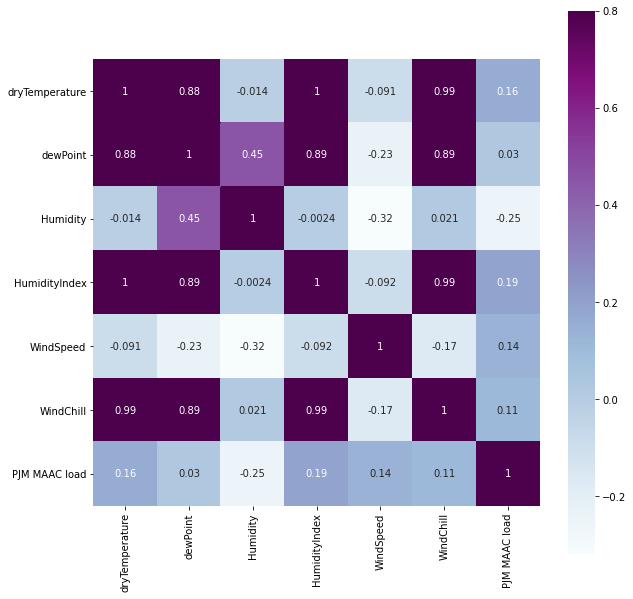

In [115]:
import seaborn as sns
train=pd.concat([x,y], axis=1)
matrix=train.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu",annot=True)

In [88]:
y=dffinal['PJM MAAC load']
x1=dffinal[['dryTemperature','HumidityIndex']]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2)
for degree in range(degree_min,degree_max+1):
    nlm = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,normalize=True,cv=5))
    nlm.fit(x1_train,y1_train)
    ynlm_pred = nlm.predict(x1_test)
    print(regression_results(y1_test,ynlm_pred))
    print('score{}\n'.format(nlm.score(x1_train, y1_train)))

explained_variance:  0.6147
mean_squared_log_error:  0.0188
r2:  0.6147
MAE:  413.4845
MSE:  252307.0559
RMSE:  502.3018
None
score0.6153277447001977

explained_variance:  0.6436
mean_squared_log_error:  0.0176
r2:  0.6436
MAE:  397.7959
MSE:  233334.5047
RMSE:  483.0471
None
score0.6433593211285349

explained_variance:  0.6448
mean_squared_log_error:  0.0176
r2:  0.6448
MAE:  397.0862
MSE:  232579.0372
RMSE:  482.2645
None
score0.6442064667713581



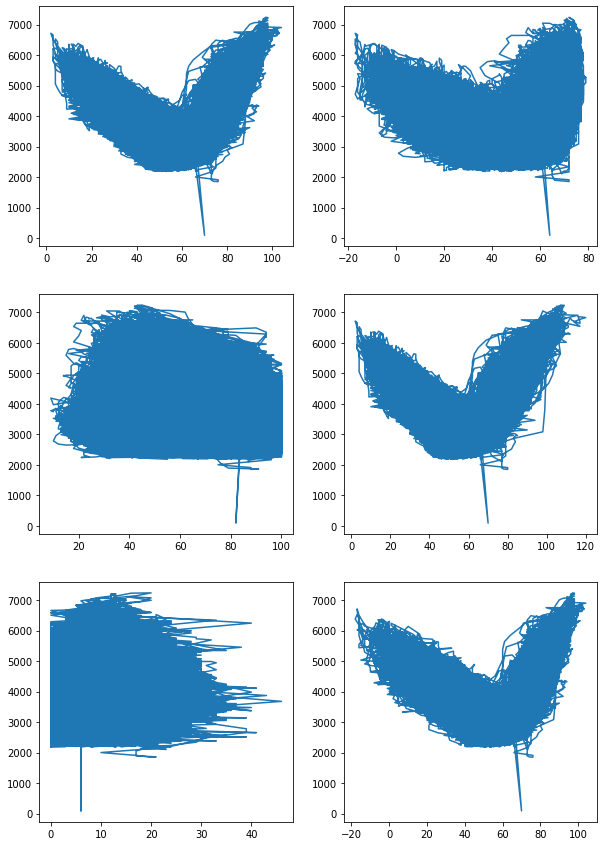

In [89]:
fig, axs = plt.subplots(3,2,figsize=(10,15))
axs[0,0].plot(x['dryTemperature'],y)
axs[0,1].plot(x['dewPoint'],y)
axs[1,0].plot(x['Humidity'],y)
axs[1,1].plot(x['HumidityIndex'],y)
axs[2,0].plot(x['WindSpeed'],y)
axs[2,1].plot(x['WindChill'],y)

In [90]:
x1=dffinal[['dryTemperature','dewPoint','Humidity']]*dffinal[['dryTemperature','dewPoint','Humidity']]
x1

,dryTemperature,dewPoint,Humidity
0,1225,1156,9216
1,1369,1296,9216
2,1369,1369,10000
3,1225,1156,9216
4,1089,1089,10000
...,...,...,...
163020,7921,4761,2704
163021,8100,4761,2500
163022,8281,4900,2500
163023,8281,4900,2500


In [91]:
y=dffinal['PJM MAAC load']
x1=dffinal[['dryTemperature','dewPoint','HumidityIndex','WindChill']]*dffinal[['dryTemperature','dewPoint','HumidityIndex','WindChill']]
x2=dffinal[['Humidity','WindSpeed']]
x1x2=pd.concat([x1,x2], axis=1)
x1x2

,dryTemperature,dewPoint,HumidityIndex,WindChill,Humidity,WindSpeed
0,1225,1156,1225,1225,96,0
1,1369,1296,1369,1369,96,3
2,1369,1369,1369,1369,100,3
3,1225,1156,1225,1225,96,3
4,1089,1089,1089,1089,100,3
...,...,...,...,...,...,...
163020,7921,4761,8836,7921,52,8
163021,8100,4761,9025,8100,50,10
163022,8281,4900,9409,8281,50,12
163023,8281,4900,9409,8281,50,9


In [92]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1x2, y, test_size = 0.2)
nlm = make_pipeline(LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,normalize=True,cv=5))
nlm.fit(x1_train,y1_train)
ynlm_pred = nlm.predict(x1_test)
print(regression_results(y1_test,ynlm_pred))
print('score{}\n'.format(nlm.score(x1_train, y1_train)))

explained_variance:  0.3398
mean_squared_log_error:  0.0298
r2:  0.3398
MAE:  524.9558
MSE:  430239.2025
RMSE:  655.9262
None
score0.3515384970309816



In [93]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2)
nlm = make_pipeline(LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,normalize=True,cv=5))
nlm.fit(x1_train,y1_train)
ynlm_pred = nlm.predict(x1_test)
print(regression_results(y1_test,ynlm_pred))
print('score{}\n'.format(nlm.score(x1_train, y1_train)))

explained_variance:  0.3515
mean_squared_log_error:  0.0292
r2:  0.3515
MAE:  518.4622
MSE:  420784.536
RMSE:  648.6791
None
score0.34516745741698074



# NoHumility probability the best one 

In [94]:
x1=dffinal[['dryTemperature','dewPoint','HumidityIndex','WindSpeed','WindChill']]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2)
for degree in range(degree_min,degree_max+1):
    nlm = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,normalize=True,cv=5))
    nlm.fit(x1_train,y1_train)
    ynlm_pred = nlm.predict(x1_test)
    print(regression_results(y1_test,ynlm_pred))
    print('score{}\n'.format(nlm.score(x1_train, y1_train)))

explained_variance:  0.6539
mean_squared_log_error:  0.0169
r2:  0.6539
MAE:  387.4979
MSE:  225597.9344
RMSE:  474.9715
None
score0.649348833022048

explained_variance:  0.6675
mean_squared_log_error:  0.0163
r2:  0.6675
MAE:  380.6136
MSE:  216736.8613
RMSE:  465.5501
None
score0.6631303391477688

explained_variance:  0.67
mean_squared_log_error:  0.0162
r2:  0.67
MAE:  379.1284
MSE:  215096.4691
RMSE:  463.7849
None
score0.6653789934779878



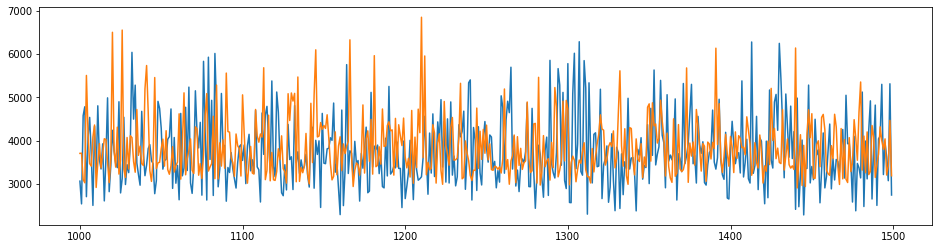

In [95]:
TrueVSPred= {'TrueLoad':y_test, 'PredLoad':ynlm_pred}
dftvp = pd.DataFrame(TrueVSPred)
dftvp=dftvp.reset_index(drop=True)
dftvp
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(dftvp['TrueLoad'][1000:1500])
ax.plot(dftvp['PredLoad'][1000:1500])

# =======================================

In [54]:
x1=dffinal[['dryTemperature','Humidity','HumidityIndex','WindSpeed','WindChill']]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2)
for degree in range(degree_min,degree_max+1):
    nlm = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(normalize=True,cv=5))
    nlm.fit(x1_train,y1_train)
    ynlm_pred = nlm.predict(x1_test)
    print(regression_results(y1_test,ynlm_pred))
    print('score{}\n'.format(nlm.score(x1_train, y1_train)))

explained_variance:  0.6353
mean_squared_log_error:  0.0177
r2:  0.6353
MAE:  397.9021
MSE:  238943.7407
RMSE:  488.8187
None
score0.6341206350207491

explained_variance:  0.6508
mean_squared_log_error:  0.017
r2:  0.6508
MAE:  389.3397
MSE:  228786.7865
RMSE:  478.3166
None
score0.6486599357294729

explained_variance:  0.6539
mean_squared_log_error:  0.0169
r2:  0.6539
MAE:  387.5305
MSE:  226749.0579
RMSE:  476.1817
None
score0.651833665140884



In [55]:
x1=dffinal[['dryTemperature','dewPoint','HumidityIndex','WindChill']]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2)
for degree in range(degree_min,degree_max+1):
    nlm = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(normalize=True,cv=5))
    nlm.fit(x1_train,y1_train)
    ynlm_pred = nlm.predict(x1_test)
    print(regression_results(y1_test,ynlm_pred))
    print('score{}\n'.format(nlm.score(x1_train, y1_train)))

explained_variance:  0.6323
mean_squared_log_error:  0.0175
r2:  0.6323
MAE:  397.1703
MSE:  237952.1312
RMSE:  487.8034
None
score0.6325748156548779

explained_variance:  0.6452
mean_squared_log_error:  0.017
r2:  0.6452
MAE:  390.5897
MSE:  229578.0663
RMSE:  479.1431
None
score0.6453558559743664

explained_variance:  0.6478
mean_squared_log_error:  0.0169
r2:  0.6478
MAE:  389.2232
MSE:  227933.5515
RMSE:  477.4239
None
score0.648486935981684



In [56]:
x1=dffinal[['dryTemperature','dewPoint','Humidity','HumidityIndex','WindSpeed','WindChill']]
y=dffinal['PJM MAAC load']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2)
for degree in range(degree_min,degree_max+1):
    nlm = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(normalize=True,cv=5))
    nlm.fit(x1_train,y1_train)
    ynlm_pred = nlm.predict(x1_test)
    print(regression_results(y1_test,ynlm_pred))
    print('score{}\n'.format(nlm.score(x1_train, y1_train)))

explained_variance:  0.6301
mean_squared_log_error:  0.0178
r2:  0.6301
MAE:  399.2197
MSE:  241254.022
RMSE:  491.1762
None
score0.6393011534476947

explained_variance:  0.6452
mean_squared_log_error:  0.0172
r2:  0.6452
MAE:  390.931
MSE:  231410.0341
RMSE:  481.051
None
score0.6529434473023544

explained_variance:  0.6474
mean_squared_log_error:  0.0171
r2:  0.6474
MAE:  389.6524
MSE:  229961.1597
RMSE:  479.5427
None
score0.6549899358324645



# Temp<30, Temp>80, 30<Temp<80


In [166]:
from sklearn.metrics import r2_score

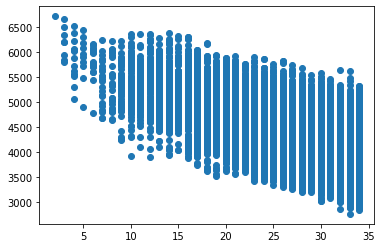

In [167]:
left_index = dffinal[dffinal['dryTemperature']<35].index

left = dffinal.loc[left_index]
x_left = left[['dryTemperature']]
y_left = left['PJM MAAC load']

plt.scatter(x_left, y_left)

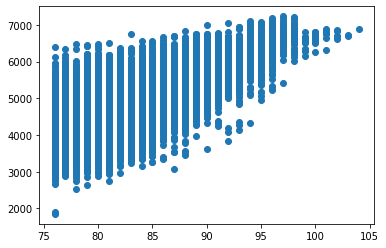

In [168]:
right_index = dffinal[dffinal['dryTemperature']>75].index

right = dffinal.loc[right_index]
x_right = right[['dryTemperature']]
y_right = right['PJM MAAC load']

plt.scatter(x_right, y_right)

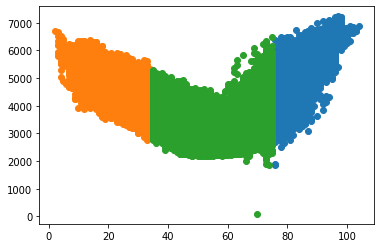

In [169]:
mid_index = dffinal[(dffinal['dryTemperature']<=75) & (dffinal['dryTemperature']>=35)].index

mid = dffinal.loc[mid_index]
x_mid = mid[['dryTemperature']]
y_mid = mid['PJM MAAC load']
plt.scatter(x_right, y_right)
plt.scatter(x_left, y_left)
plt.scatter(x_mid, y_mid)

In [148]:
xleft_train, xleft_test, yleft_train, yleft_test = train_test_split(x_left, y_left, test_size = 0.2, random_state = 0) 

modelleft = LinearRegression() 
modelleft.fit(xleft_train, yleft_train) 
yleft_pred = modelleft.predict(xleft_test)

In [149]:
r2_score(yleft_test, yleft_pred)

0.303581252051757

In [150]:
xright_train, xright_test, yright_train, yright_test = train_test_split(x_right, y_right, test_size = 0.2, random_state = 0) 

modelright = LinearRegression() 
modelright.fit(xright_train, yright_train) 
yright_pred = modelright.predict(xright_test)

In [151]:
r2_score(yright_test, yright_pred)

0.5683459937596294

In [152]:
xmid_train, xmid_test, ymid_train, ymid_test = train_test_split(x_mid, y_mid, test_size = 0.2)

modelmid = make_pipeline(PolynomialFeatures(2, interaction_only=False), LassoCV(normalize=True,cv=5))
modelmid.fit(xmid_train,ymid_train)
ymid_pred = modelmid.predict(xmid_test)

In [153]:
r2_score(ymid_test, ymid_pred)

0.22935365445969946

In [154]:
len(yleft_pred),len(yright_pred),len(ymid_pred),

(4378, 5745, 22483)

In [155]:
y_pred=np.concatenate((yleft_pred, ymid_pred), axis=0)
y_pred=np.concatenate((y_pred, yright_pred), axis=0)

y_pred.shape

(32606,)

In [156]:
yy_test=np.concatenate((yleft_test, ymid_test), axis=0)
yy_test=np.concatenate((yy_test, yright_test), axis=0)

yy_test.shape

(32606,)

In [157]:
regression_results(yy_test,y_pred)

explained_variance:  0.642
mean_squared_log_error:  0.0177
r2:  0.642
MAE:  397.9445
MSE:  233680.9422
RMSE:  483.4056


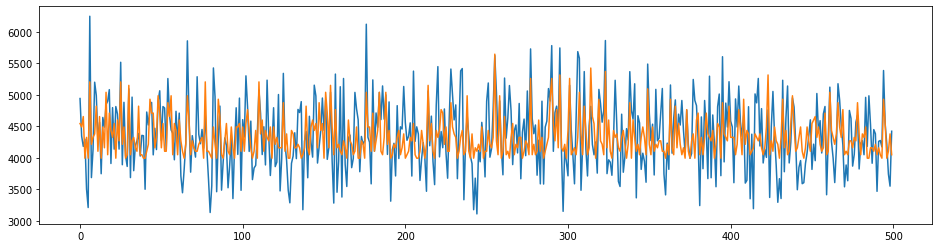

In [158]:
TrueVSPred= {'TrueLoad':yy_test, 'PredLoad':y_pred}
dftvp = pd.DataFrame(TrueVSPred)
dftvp=dftvp.reset_index(drop=True)
dftvp
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(dftvp['TrueLoad'][:500])
ax.plot(dftvp['PredLoad'][:500])

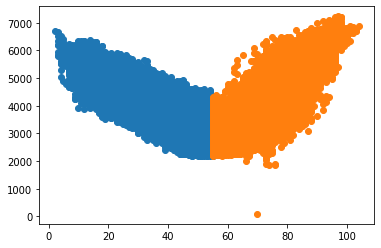

In [170]:
left_index = dffinal[dffinal['dryTemperature']<=55].index

left = dffinal.loc[left_index]
x_left = left[['dryTemperature']]
y_left = left['PJM MAAC load']

plt.scatter(x_left, y_left)

right_index = dffinal[dffinal['dryTemperature']>=55].index

right = dffinal.loc[right_index]
x_right = right[['dryTemperature']]
y_right = right['PJM MAAC load']

plt.scatter(x_right, y_right)

In [171]:
xleft_train, xleft_test, yleft_train, yleft_test = train_test_split(x_left, y_left, test_size = 0.2, random_state = 0) 

modelleft = LinearRegression() 
modelleft.fit(xleft_train, yleft_train) 
yleft_pred = modelleft.predict(xleft_test)

In [172]:
r2_score(yleft_test, yleft_pred)

0.4768329720079715

In [173]:
xright_train, xright_test, yright_train, yright_test = train_test_split(x_right, y_right, test_size = 0.2, random_state = 0) 

modelright = LinearRegression() 
modelright.fit(xright_train, yright_train) 
yright_pred = modelright.predict(xright_test)

In [174]:
r2_score(yright_test, yright_pred)

0.6489429771495063

In [175]:
y_pred=np.concatenate((yleft_pred, yright_pred), axis=0)
yy_test=np.concatenate((yleft_test, yright_test), axis=0)

In [176]:
regression_results(yy_test,y_pred)

explained_variance:  0.5948
mean_squared_log_error:  0.0205
r2:  0.5948
MAE:  426.017
MSE:  265359.6326
RMSE:  515.1307


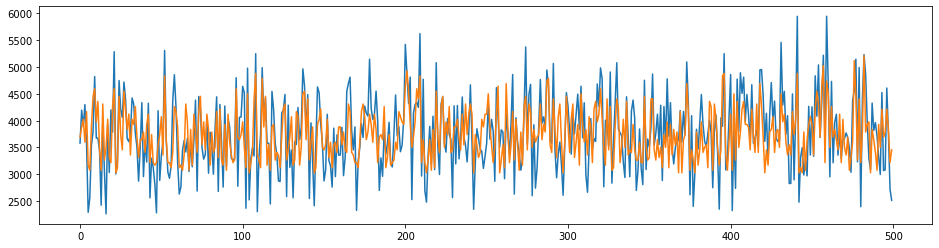

In [177]:
TrueVSPred= {'TrueLoad':yy_test, 'PredLoad':y_pred}
dftvp = pd.DataFrame(TrueVSPred)
dftvp=dftvp.reset_index(drop=True)
dftvp
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(dftvp['TrueLoad'][:500])
ax.plot(dftvp['PredLoad'][:500])